In [2]:
# Adding src module to path
import sys
import os
module_path = os.path.abspath(os.path.join('../..'))

print(f"module path {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)


module path C:\Users\Sebastian\Python\Master-Thesis-Project


In [3]:
# general imports
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.nqs import RBM,  IsingHamiltonian, IsingHamiltonianReduced


## Testing hidden node accuracy

Training several RBMs with increasing number of visible nodes. For each RBM we test how increasing the number of hidden nodes affects accuracy.

In [4]:
seed=42
#Initializing starting values 



In [10]:
visible_list = []
hidden_list = []
hidden_size = 1
for v in range(2,9):
    np.random.seed(seed)
    visible_size = v

    gamma = utils.random_gamma(n=v)
    hamiltonian = IsingHamiltonianReduced(gamma=gamma)
    diag_h = IsingHamiltonian(gamma=gamma)
    
    eig,_ = np.linalg.eigh(diag_h)
    E_truth = np.min(eig)
    
    
    while(True):
        
        h = hidden_size
        print(f"Current hidden size is: {hidden_size}, current visible size is: {visible_size}")
        
        rbm = RBM(visible_size=visible_size, hidden_size=h, hamiltonian=hamiltonian, walker_steps=1000)
        
        energies = rbm.train(iterations=2000, lr=0.01, print_energy=False, termination_condition=(0.01, E_truth))
        print(f"Error: {utils.relative_error(energies[-1], E_truth)}, iterations: {len(energies)}")

        if utils.relative_error(energies[-1], E_truth) < 0.01:
            visible_list.append(v)
            hidden_list.append(h)
            break
        else:
            hidden_size+=1
        



Current hidden size is: 1, current visible size is: 2
func:train args:[(<src.nqs.RBM object at 0x0000019A1FB87460>,), {'iterations': 2000, 'lr': 0.01, 'print_energy': False, 'termination_condition': (0.01, -0.4967141530112327)}] took: 20.85286545753479 sec
Error: 0.0072225494653578165, iterations: 58
Current hidden size is: 1, current visible size is: 3
func:train args:[(<src.nqs.RBM object at 0x0000019A23666D30>,), {'iterations': 2000, 'lr': 0.01, 'print_energy': False, 'termination_condition': (0.01, -0.6349784541824175)}] took: 31.241374731063843 sec
Error: 0.009822794833594247, iterations: 84
Current hidden size is: 1, current visible size is: 4
func:train args:[(<src.nqs.RBM object at 0x0000019A1FB87460>,), {'iterations': 2000, 'lr': 0.01, 'print_energy': False, 'termination_condition': (0.01, -1.28266699228311)}] took: 732.0662906169891 sec
Error: 0.2749081085557377, iterations: 2000
Current hidden size is: 2, current visible size is: 4
func:train args:[(<src.nqs.RBM object at 0x

visble= [2, 3, 4, 5, 6, 7, 8]
hidden = [1, 1, 2, 2, 2, 3, 4]


<IPython.core.display.Javascript object>


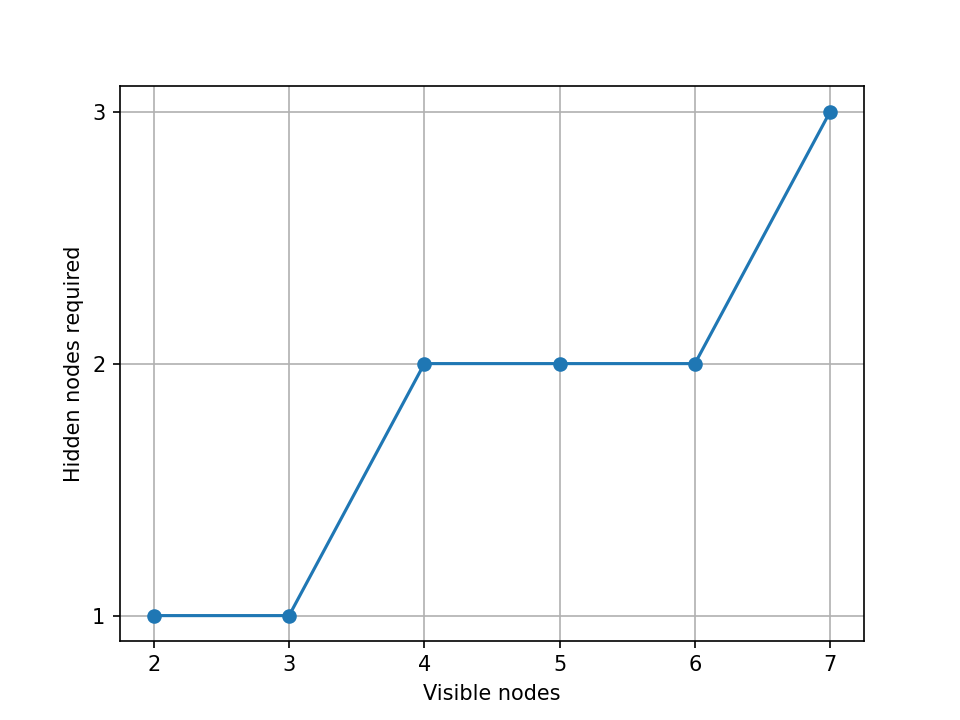

In [37]:
#labels = [f"Hidden size= {i}" for i in range(1,5)]

print(f"visble= {visible_list}")
print(f"hidden = {hidden_list}")
import math

h_list = hidden_list[:len(hidden_list)-1]
v_list = visible_list[:len(visible_list)-1]
yint = range(math.floor(min(h_list)), math.ceil(max(h_list)+1))

plt.figure(0)
plt.yticks(yint)
plt.plot(v_list, h_list, marker='o')
    


plt.xlabel("Visible nodes")
plt.ylabel(r'Hidden nodes required')
plt.grid()
#plt.legend(labels)


#obtain m (slope) and b(intercept) of linear regression line
#m, b = np.polyfit(visible_list, hidden_list, 1)

#use red as color for regression line
#plt.plot(visible_list, m*np.asarray(visible_list)+b, '--')


In [30]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/hidden_impact_ising.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")

visble= [2, 3, 4, 5, 6, 7, 8]
hidden = [1, 1, 2, 2, 2, 3, 4]


<IPython.core.display.Javascript object>


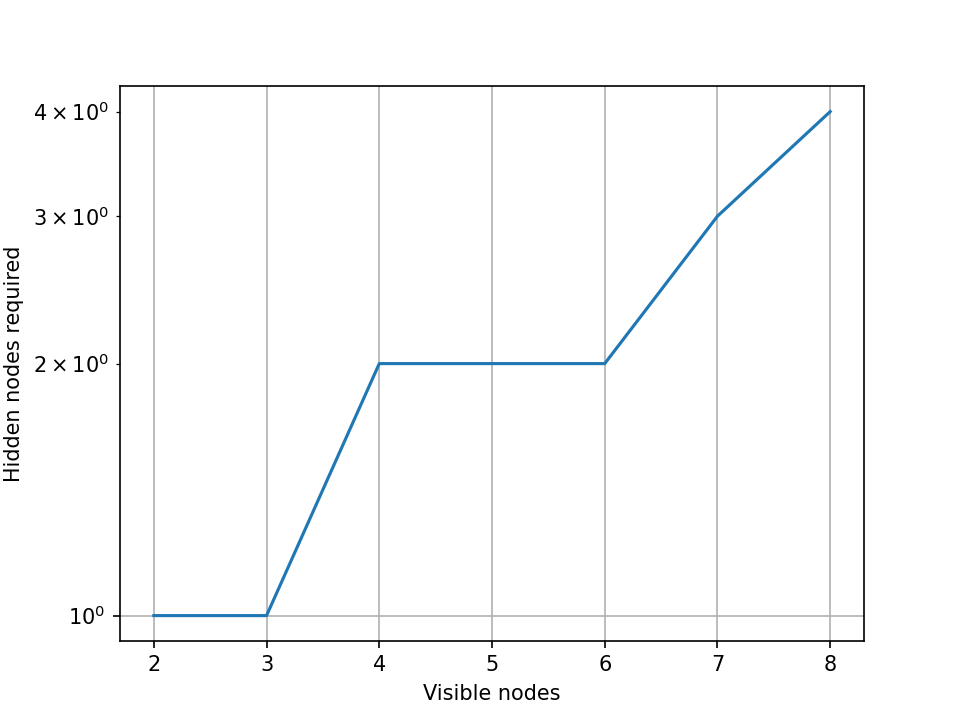

In [20]:
#labels = [f"Hidden size= {i}" for i in range(1,5)]

print(f"visble= {visible_list}")
print(f"hidden = {hidden_list}")
import math

#yint = range(math.floor(min(hidden_list)), math.ceil(max(hidden_list)))

plt.figure(1)
#plt.yticks(yint)
plt.semilogy(visible_list, hidden_list)
    


plt.xlabel("Visible nodes")
plt.ylabel(r'Hidden nodes required')
plt.grid()
#plt.legend(labels)


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(visible_list, hidden_list, 1)

#use red as color for regression line
#plt.plot(visible_list, m*np.asarray(visible_list)+b, '--')

In [6]:

# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d;%H%M'

path = f"{desktop_path}\\{datetime.now().strftime(date_format)}-2_node_plots"
os.makedirs(path)
plt.savefig(f"{path}/{n_vis}nodes.pdf")

NameError: name 'n_vis' is not defined